# TP – Analyse de données IoT d’un capteur de température

Fonction si dessous pour enregistrer les résultats s'ils dépassent 10 lignes dans le terminal

In [15]:
def afficher_ou_sauver(df_resultat, nom_fichier):
    if len(df_resultat) > 10:
        df_resultat.to_csv(nom_fichier, index=False)
        print(f"Résultat trop long : enregistré dans {nom_fichier}")
    else:
        print(df_resultat)


## Partie 1 : Nettoyage et préparation des données

1. Convertir le fichier CSV fourni en tableau exploitable (Excel, Python, etc.)

In [1]:
import pandas as pd

nom_fichier = './IOT-temp.csv'
df = pd.read_csv(nom_fichier)
print(df)

                                        id  room_id/id        noted_date  \
0      __export__.temp_log_196134_bd201015  Room Admin  08-12-2018 09:30   
1      __export__.temp_log_196131_7bca51bc  Room Admin  08-12-2018 09:30   
2      __export__.temp_log_196127_522915e3  Room Admin  08-12-2018 09:29   
3      __export__.temp_log_196128_be0919cf  Room Admin  08-12-2018 09:29   
4      __export__.temp_log_196126_d30b72fb  Room Admin  08-12-2018 09:29   
...                                    ...         ...               ...   
97601   __export__.temp_log_91076_7fbd08ca  Room Admin  28-07-2018 07:07   
97602  __export__.temp_log_147733_62c03f31  Room Admin  28-07-2018 07:07   
97603  __export__.temp_log_100386_84093a68  Room Admin  28-07-2018 07:06   
97604  __export__.temp_log_123297_4d8e690b  Room Admin  28-07-2018 07:06   
97605  __export__.temp_log_133741_32958703  Room Admin  28-07-2018 07:06   

       temp out/in  
0        29     In  
1        29     In  
2        41    Out  
3  

2. Vérifier l’unicité des enregistrements.

In [8]:
print("Nombre de doublons :", df.duplicated().sum())

Nombre de doublons : 1


3. Nettoyer les doublons eventuels

In [ ]:
print("Nombre de doublons :", df.duplicated().sum())

## Partie 2 : Analyse de base

1. Compter le nombre d’entrées et de sorties par minute.

In [18]:
df['noted_date'] = pd.to_datetime(df['noted_date'], format='%d-%m-%Y %H:%M')

df['minute'] = df['noted_date'].dt.floor('T') 
compte_in_out = df.groupby(['minute', 'out/in']).size().unstack(fill_value=0)
print("\nNombre d'entrées/sorties par minute :\n", compte_in_out)



Nombre d'entrées/sorties par minute :
 out/in               In  Out
minute                      
2018-07-28 07:06:00   3    0
2018-07-28 07:07:00  19    8
2018-07-28 07:08:00   4    1
2018-07-28 07:09:00   0    2
2018-07-28 07:10:00   1    0
...                  ..  ...
2018-12-08 09:25:00   0    2
2018-12-08 09:26:00   2    0
2018-12-08 09:28:00   2    0
2018-12-08 09:29:00   2    2
2018-12-08 09:30:00   2    0

[27920 rows x 2 columns]


C:\Users\thoma\AppData\Local\Temp\ipykernel_9296\644501452.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df['minute'] = df['noted_date'].dt.floor('T')


2. Calculer la température moyenne pendant les entrées et les sorties

In [ ]:
temp_moyenne = df.groupby('out/in')['temp'].mean()
print("\nTempérature moyenne lors des entrées et sorties :\n", temp_moyenne)


Température moyenne lors des entrées et sorties :
 out/in
In     30.453920
Out    36.265244
Name: temp, dtype: float64


3. Identifier la température maximale et minimale enregistrée, ainsi que l’heure correspondante.


In [13]:
temp_max = df.loc[df['temp'].idxmax()]
temp_min = df.loc[df['temp'].idxmin()]

print(f"\nTempérature maximale : {temp_max['temp']} °C à {temp_max['noted_date']}")
print(f"Température minimale : {temp_min['temp']} °C à {temp_min['noted_date']}")


Température maximale : 51 °C à 2018-09-30 17:29:00
Température minimale : 21 °C à 2018-12-03 11:02:00


## Partie 3 Détection d’anomalies

1. Définir un seuil critique de température (par exemple : > 40°C).

In [ ]:
seuil_temp = 40  
anomalies = df[df['temp'] > seuil_temp]

print("\nAnomalies (temp > 40°C) :\n")
afficher_ou_sauver(anomalies, "Q3_anomalies_temperature.csv")



Anomalies (temp > 40°C) :

Résultat trop long : enregistré dans Q3_anomalies_temperature.csv


3. Proposer une action automatique en cas de dépassement (alerte mail, allumage d’un
ventilateur, etc.).

In [22]:
anomalies = df[df['temp'] > seuil_temp]

print("\n⚠️ Températures critiques (supérieures à 40°C) détectées")
print(anomalies[['temp']])
if not anomalies.empty:
    print("⚠️ Alerte : Température critique détectée !")
    destinataire = "thocle03@gmail.com"
    print(f"Envoi d'un mail d’alerte à : {destinataire}")
    print("Objet : ALERTE TEMPÉRATURE\nCorps : Température > 40°C détectée.")


⚠️ Températures critiques (supérieures à 40°C) détectées
       temp
2        41
3        41
10       42
11       42
16       41
...     ...
57215    42
57217    41
57219    41
57220    41
57228    41

[16761 rows x 1 columns]
⚠️ Alerte : Température critique détectée !
Envoi d'un mail d’alerte à : thocle03@gmail.com
Objet : ALERTE TEMPÉRATURE
Corps : Température > 40°C détectée.


## Part 4 Visualisation

KeyboardInterrupt: 

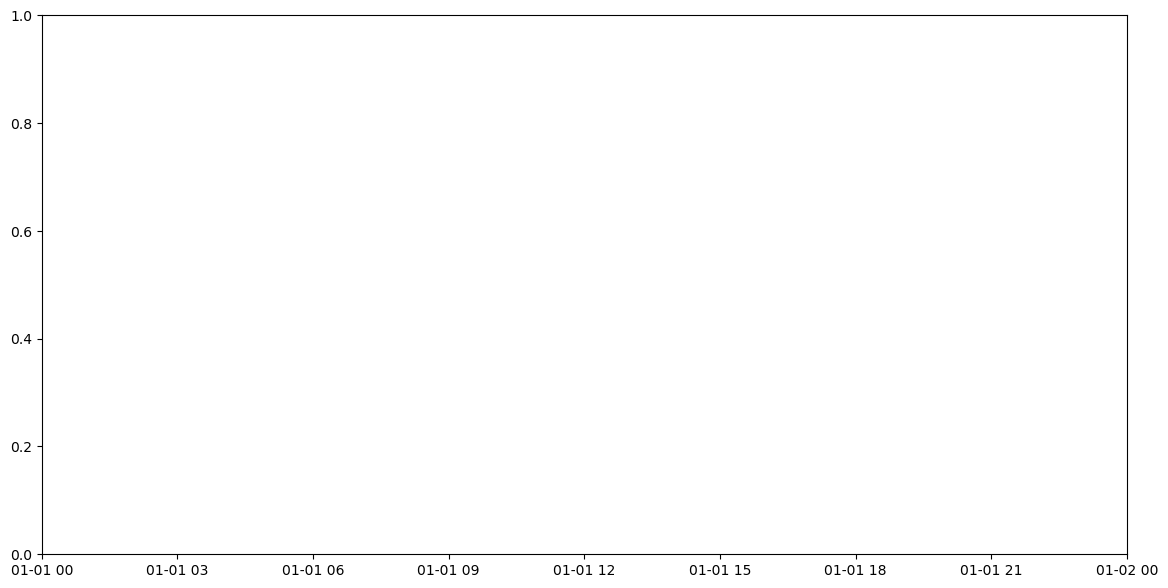

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='noted_date', y='temp', label='Température')